In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


baseball dataset has been loaded

In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Earned runs average coloumn is a float datatype remaing all are integer data type

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors respectively

Output: Number of predicted wins (W)

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


maximum wins 100 and minimum wins 63.It has minimum error value as 75 and maximum as 126

In [6]:
df.shape

(30, 17)

dataset has 30 rows and 17 columns

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

there are no null values in any column

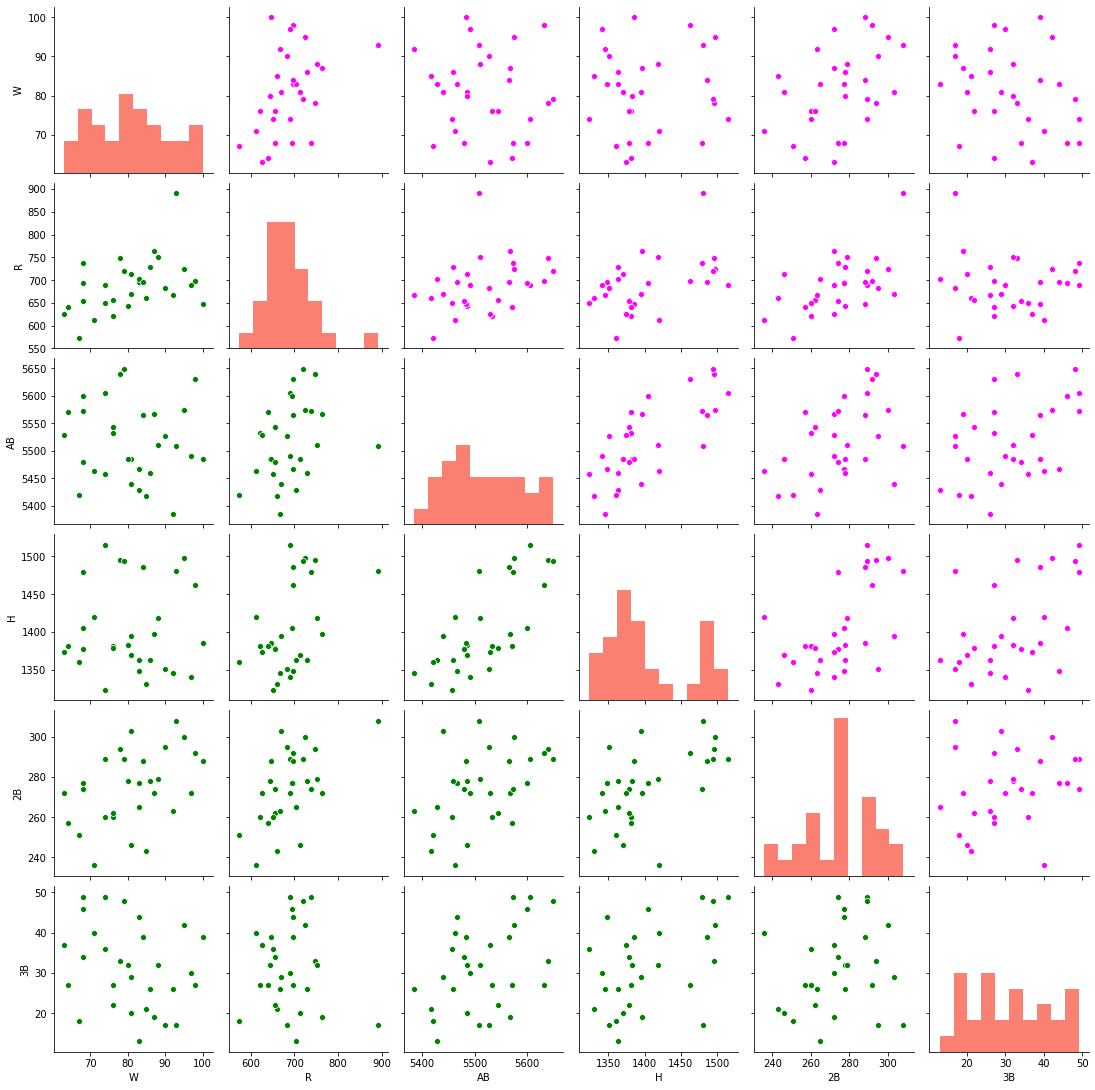

In [8]:
cols=['W', 'R', 'AB', 'H', '2B', '3B']
g = sns.PairGrid(df[cols])
g.map_upper(sns.scatterplot,color=(1,0,1))
g.map_lower(sns.scatterplot, color="green")
g.map_diag(plt.hist,color='salmon')
plt.show()

The data points of the features R and AB showing an uphill pattern as you move from left to right so it has positive relationship. The data points of the features R and W showing an uphill pattern as you move from left to right so it has positive relationship.

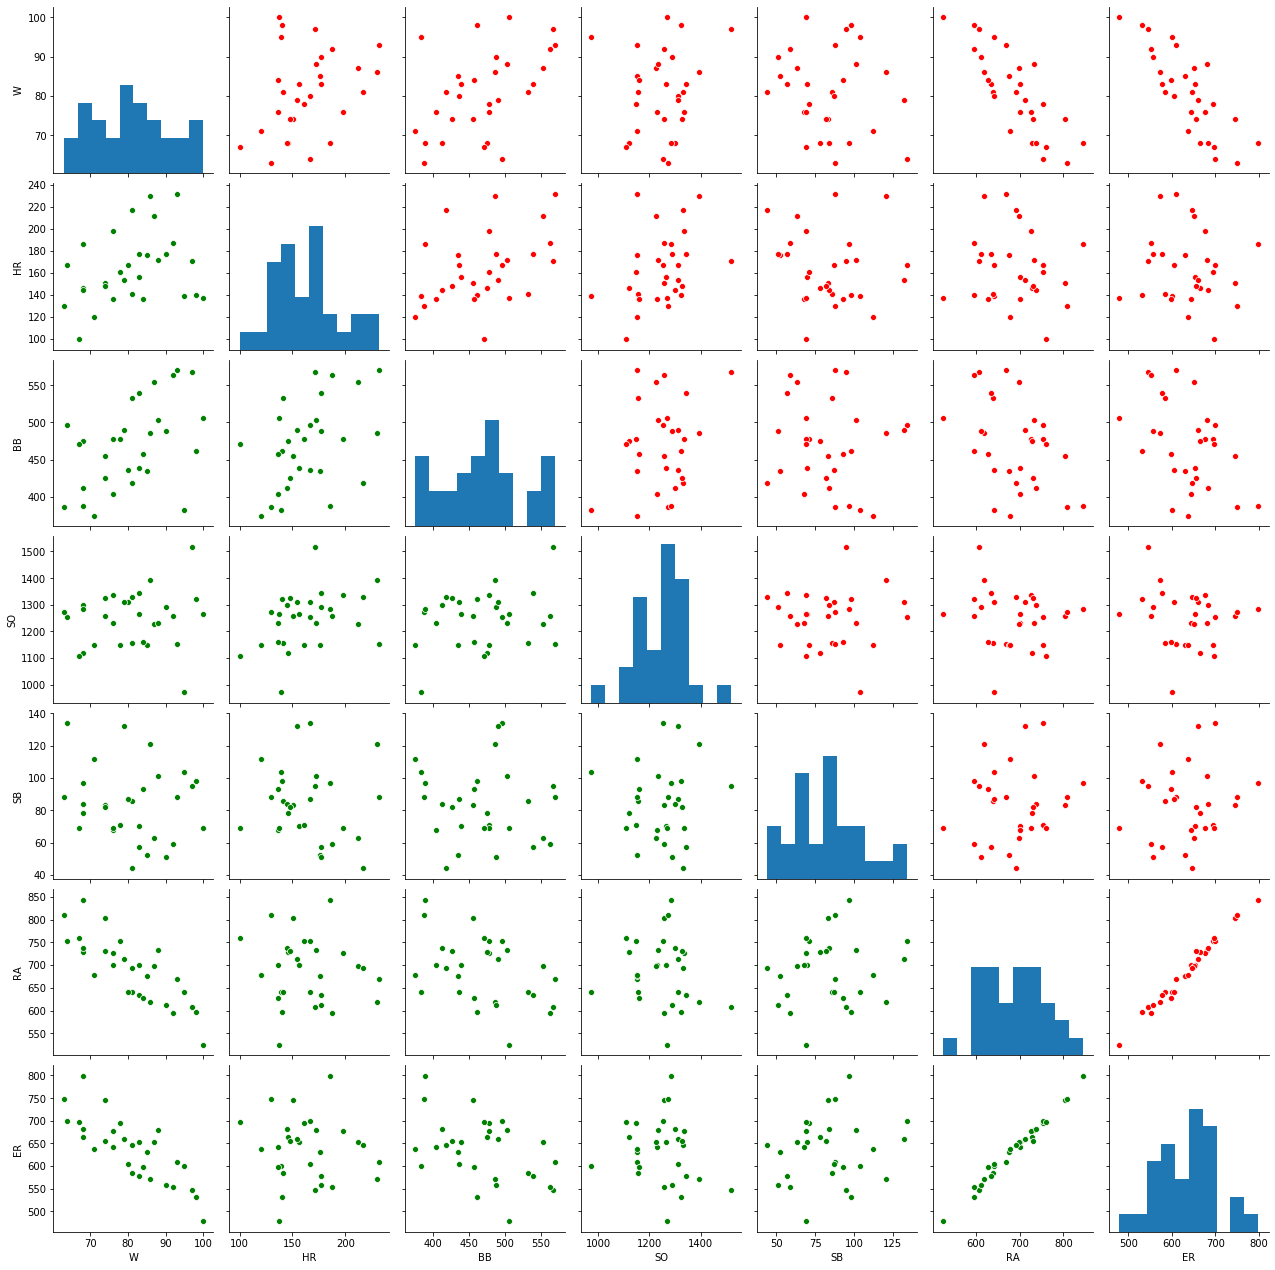

In [9]:
cols2=['W','HR', 'BB', 'SO', 'SB', 'RA', 'ER']
g = sns.PairGrid(df[cols2])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)
plt.show()

the data points of ER and RA showing an uphill pattern as you move from left to right so it has positive relationship. the data points of ER and w showing an downhill pattern as you move from left to right so it has negative relationship. the data points of RA and w showing an downhill pattern as you move from left to right so it has negative relationship.

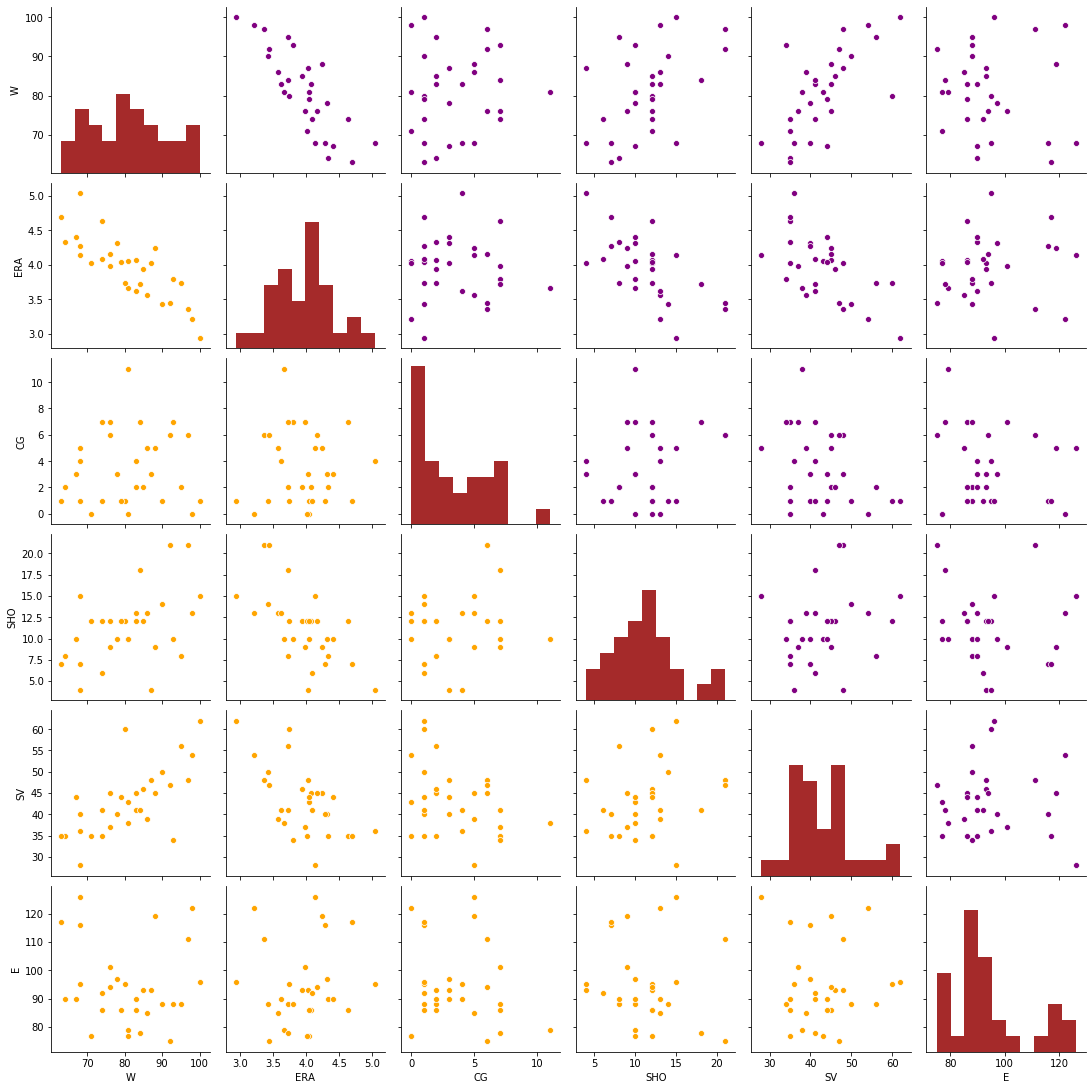

In [10]:
cols3=['W','ERA', 'CG', 'SHO', 'SV', 'E']
g = sns.PairGrid(df[cols3])
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color="orange")
g.map_diag(plt.hist,color='brown')
plt.show()

The data points of the features ERA and w showing an downhill pattern as you move from left to right so it has negative relationship. The data points of the features SV and W showing an uphill pattern as you move from left to right so it has positive relationship.

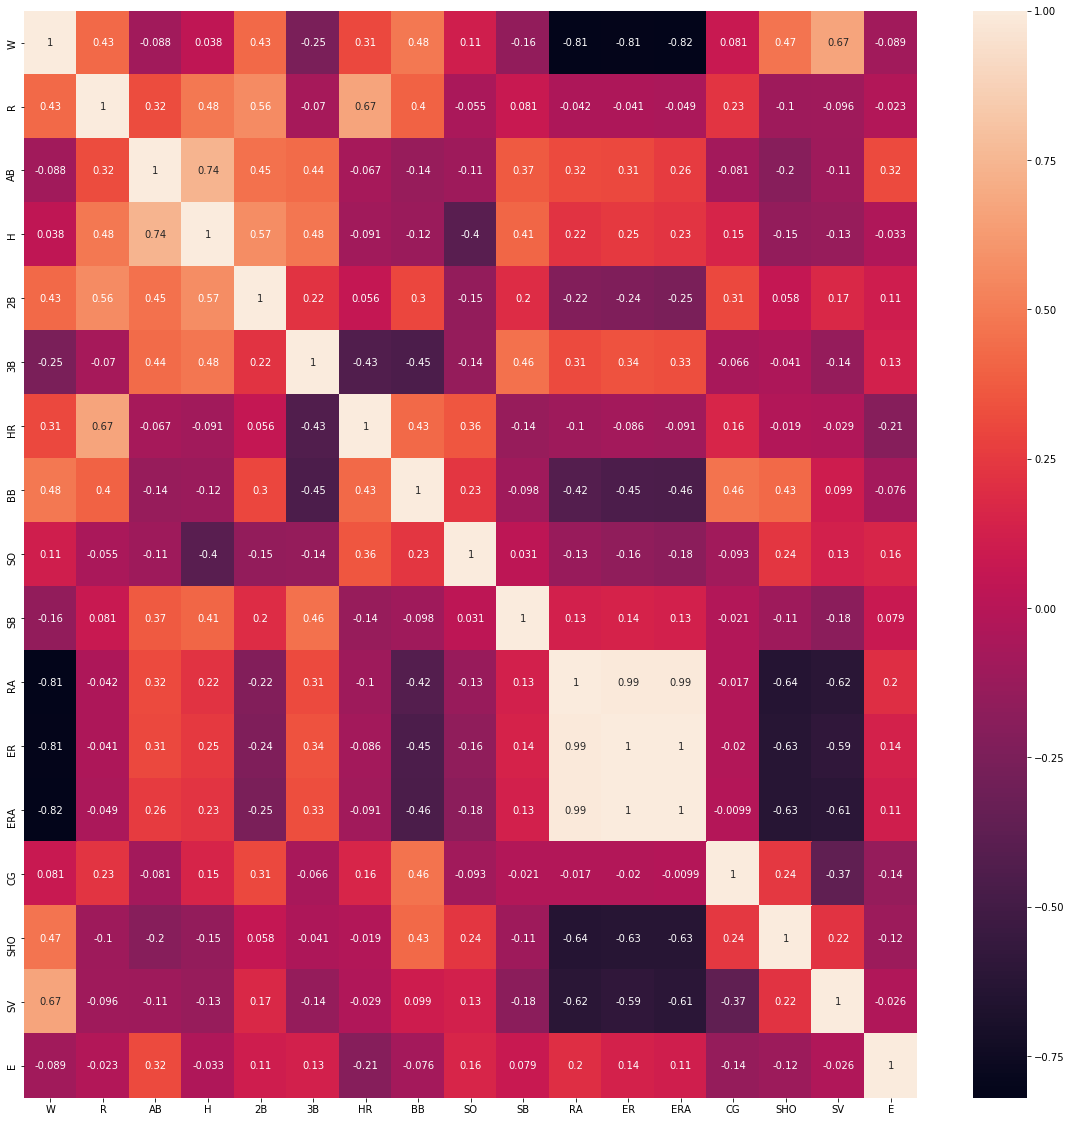

In [11]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

RA,ER,ERA features are highly negatively correlated with wins.

RA,ER,ERA features are highly negatively correlated with BB.

RA,ER,ERA features are highly negatively correlated with sv and sho.

Sho,bb,2b,SV,HR are positively correlated with win

ER andERA are posively correlated with RA

wins feature is highly and positively correlated with saves

RA,ER,ERA features are highly negatively correlated with saves. h,cg having very less correlation with wins

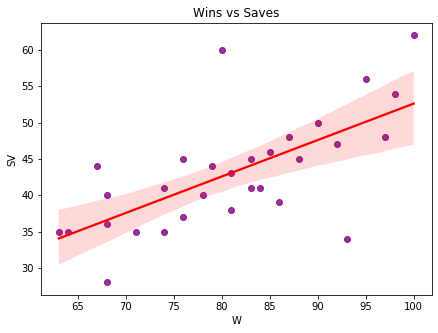

In [12]:
plt.figure(figsize=(7,5))
plt.title('Wins vs Saves')
sns.set_style="white_grid"
sns.regplot(x="W",y="SV",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
plt.show()

In this reg plot it is apparent that SV is positively correlated with W data.most of the datapoints are almost close to best fit line it means that the feature SV and W having linear relationship

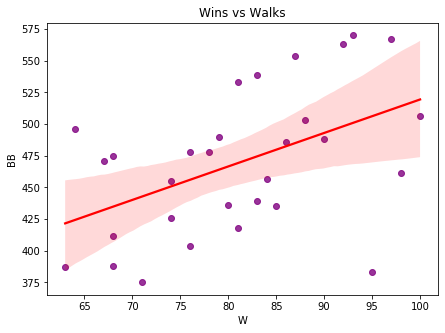

In [13]:
plt.figure(figsize=(7,5))
plt.title('Wins vs Walks')
sns.set_style="white_grid"
sns.regplot(x="W",y="BB",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that BB is positively correlated with W data.only few datapoints are close to best fit line it means that the feature BB and W are not having linear relationship.if the value of bb is between 400 to 450 there is more chance to win

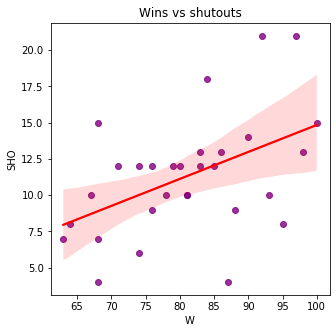

In [14]:
plt.figure(figsize=(5,5))
plt.title('Wins vs shutouts')
sns.set_style="white_grid"
sns.regplot(x="W",y="SHO",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that SHO is positively correlated with W data.only few datapoints are close to best fit line it means that the feature SHO and W are not having linear relationship

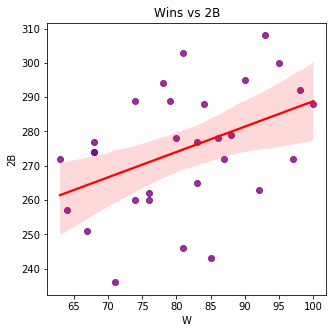

In [15]:
plt.figure(figsize=(5,5))
plt.title('Wins vs 2B')
sns.set_style="white_grid"
sns.regplot(x="W",y="2B",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that 2B is positively correlated with W data.only few datapoints are close to best fit line it means that the feature 2B and W are not having linear relationship

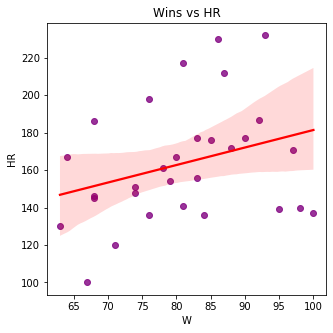

In [16]:
plt.figure(figsize=(5,5))
plt.title('Wins vs HR')
sns.set_style="white_grid"
sns.regplot(x="W",y="HR",data=df,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})

In this reg plot it is apparent that HR is positively correlated with W data.only few datapoints are close to best fit line it means that the feature HR and W are not having linear relationship



IDENTIFYING OUTLIERS



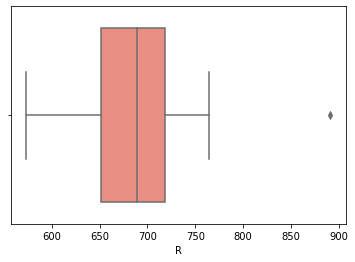

In [17]:
sns.boxplot(df['R'],color="salmon")

column R has outlier

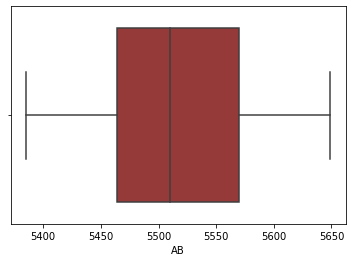

In [18]:
sns.boxplot(df['AB'],color="brown")

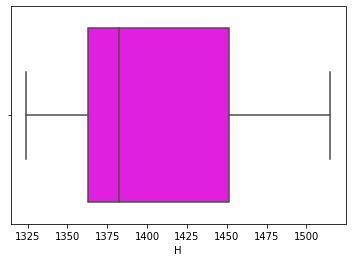

In [19]:
sns.boxplot(df['H'],color=(1,0,1))

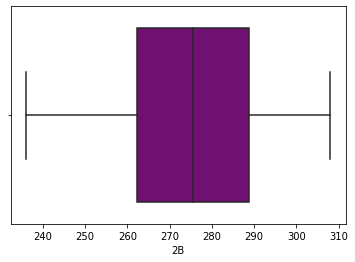

In [20]:
sns.boxplot(df['2B'],color="Purple")

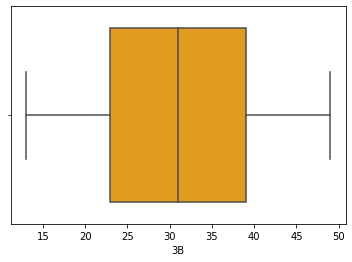

In [21]:
sns.boxplot(df['3B'],color="orange")

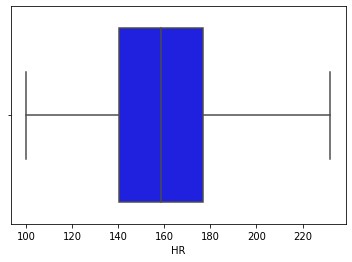

In [22]:
sns.boxplot(df['HR'],color=(0,0,1))

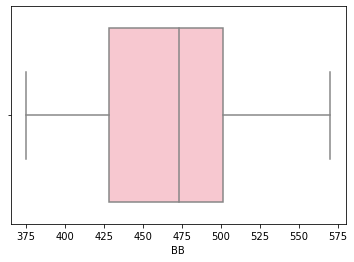

In [23]:
sns.boxplot(df['BB'],color="pink")

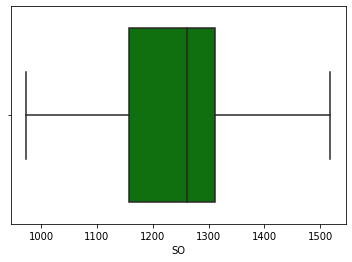

In [24]:
sns.boxplot(df['SO'],color="green")

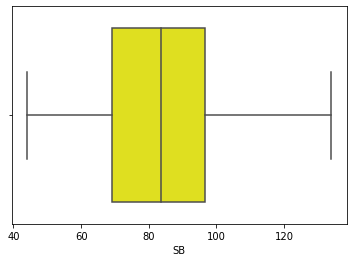

In [25]:
sns.boxplot(df['SB'],color="yellow")

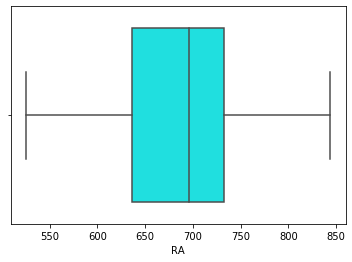

In [26]:
sns.boxplot(df['RA'],color=(0,1,1))

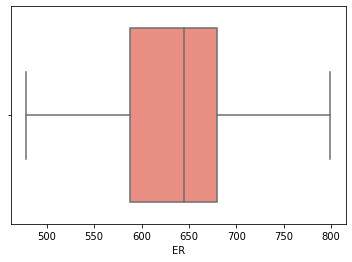

In [27]:
sns.boxplot(df['ER'],color="salmon")

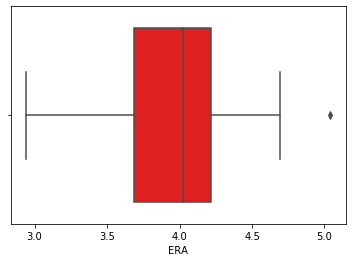

In [28]:
sns.boxplot(df['ERA'],color="red")

column ERA has outlier

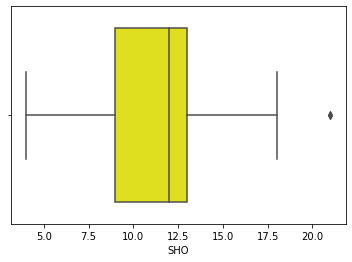

In [29]:
sns.boxplot(df['SHO'],color=(1,1,0))

column SHO has outlier

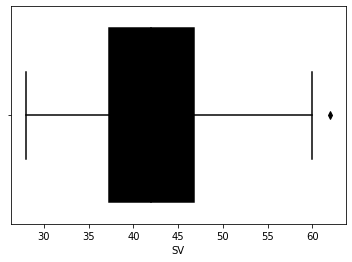

In [30]:
sns.boxplot(df['SV'],color=(0,0,0))

feature SV has outlier

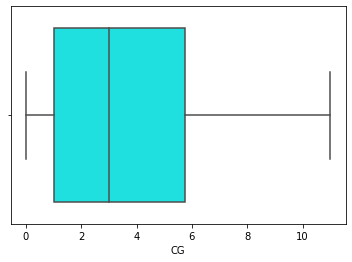

In [31]:
sns.boxplot(df['CG'],color=(0,1,1))

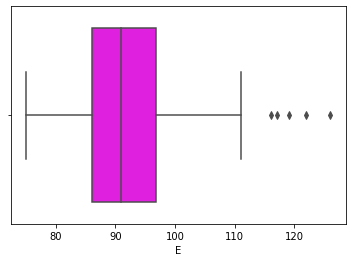

In [32]:
sns.boxplot(df['E'],color=(1,0,1))

column E has outlier

In [33]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print(np.where(z > 3))

(array([5], dtype=int64), array([1], dtype=int64))


In [34]:
data_mod = df[(z<3).all(axis=1)]
data_mod.shape

(29, 17)

In [35]:
#DATA LOSS
((30-29)/30)*100

3.3333333333333335

After using z score it has only 3.3333% data loss

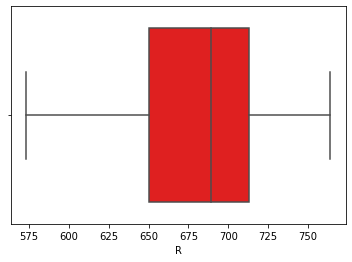

In [36]:
sns.boxplot(data_mod['R'],color="red")

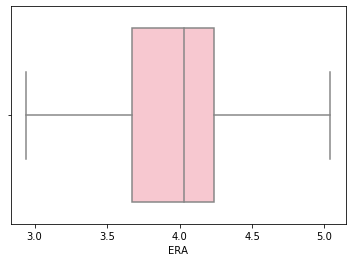

In [37]:
sns.boxplot(data_mod['ERA'],color="pink")

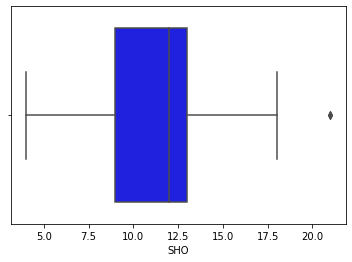

In [38]:
sns.boxplot(data_mod['SHO'],color="blue")

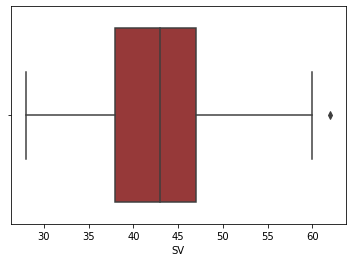

In [39]:
sns.boxplot(data_mod['SV'],color="brown")

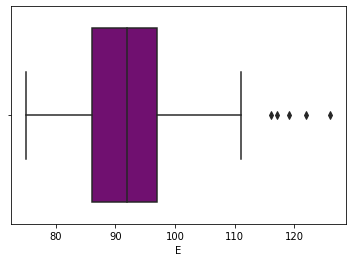

In [40]:
sns.boxplot(data_mod['E'],color="purple")

After using z_score the outliers in the features R and ERA are removed but the features SV,SHO,E are still having outliers. We can use IQR method 

In [41]:
data=df
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
df_new=data[~((data<(Q1-1.5*IQR))| (data>(Q1+1.5*IQR))).any(axis=1)]

In [42]:
df_new.shape

(6, 17)

In [43]:
((30-6)/30)*100

80.0

There is 80% data loss so I'm choosing zscore method

HANDLING SKEWNESS

In [44]:
for col in enumerate(list(data_mod.columns.values)):
    print(col[1],"=",data_mod[col[1]].skew())

W = 0.11901344569985461
R = -0.21536363420992782
AB = 0.16957316834729352
H = 0.7837722117274881
2B = -0.335303936110201
3B = 0.09012434653848651
HR = 0.45086158125803544
BB = 0.15119282971519954
SO = -0.2338149185462262
SB = 0.4949657663368456
RA = 0.018155177145956613
ER = 0.018460990156758887
ERA = 0.016693217783651695
CG = 0.8549795901105167
SHO = 0.5269430585305683
SV = 0.6274804879503074
E = 0.8402711976867623


the features H,CG,SHO,SV,E having skewness

In [45]:
data_clean=np.cbrt(data_mod)

In [46]:
for col in enumerate(list(data_clean.columns.values)):
    print(col[1],"=",data_clean[col[1]].skew())

W = -0.0318260355358766
R = -0.32972923511443586
AB = 0.15530070568109564
H = 0.7536959466136843
2B = -0.42378765828230225
3B = -0.30096728473928125
HR = 0.09388597676446064
BB = 0.008881526035134578
SO = -0.4982547147310651
SB = 0.07921997420293456
RA = -0.16624783966795706
ER = -0.20128937876694342
ERA = -0.22623843105649752
CG = -1.0139811466535003
SHO = -0.2981363527076689
SV = 0.2809633925573293
E = 0.671747645882412


In [47]:
data_clean['E']=np.log10(data_clean['E'])

In [48]:
data_clean['E']=np.log1p(data_clean['E'])

In [49]:
data_clean['E'].skew()

0.5597569983307409

In [50]:
data_clean['CG']=np.exp(data_clean['CG'])

In [51]:
data_clean['CG'].skew()

0.3457596073807261

In [52]:
for col in enumerate(list(data_clean.columns.values)):
    print(col[1],"=",data_clean[col[1]].skew())

W = -0.0318260355358766
R = -0.32972923511443586
AB = 0.15530070568109564
H = 0.7536959466136843
2B = -0.42378765828230225
3B = -0.30096728473928125
HR = 0.09388597676446064
BB = 0.008881526035134578
SO = -0.4982547147310651
SB = 0.07921997420293456
RA = -0.16624783966795706
ER = -0.20128937876694342
ERA = -0.22623843105649752
CG = 0.3457596073807261
SHO = -0.2981363527076689
SV = 0.2809633925573293
E = 0.5597569983307409


Skewness is removed except for H column

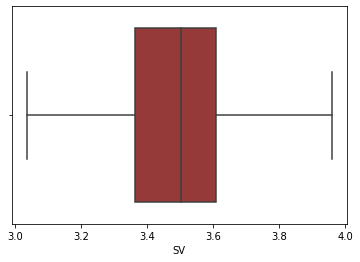

In [53]:
sns.boxplot(data_clean['SV'],color="brown")

after removing skewness the outliers in the SV is removed

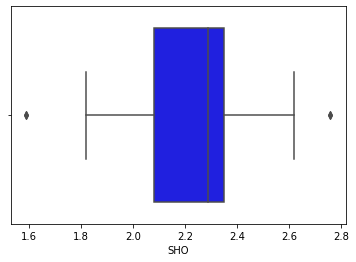

In [54]:
sns.boxplot(data_clean['SHO'],color="blue")

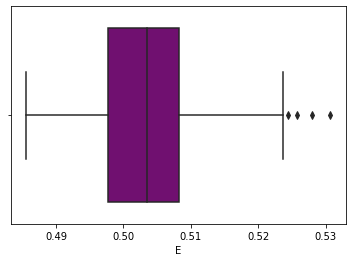

In [55]:
sns.boxplot(data_clean['E'],color="purple")

After removing skewness the outliers in the feature SV is removed.The features SHO and E are still having outliers

In [56]:
z1 = np.abs(stats.zscore(data_clean['E']))
print(z1)

[0.43172386 0.59586439 1.20492067 0.54513128 0.59586439 0.03851152
 1.38977756 0.11237802 0.25985262 1.69276172 0.67949926 0.03851152
 0.0373696  2.08895345 0.18653285 1.86557597 1.20775385 1.51515191
 0.27159224 0.43172386 0.27159224 1.38977756 0.27159224 1.57490384
 1.57993826 1.29670401 0.59586439 0.11528513 0.11237802]


In [57]:
data_clean['E'] = data_clean[(z1<3)]
data_clean.shape

(29, 17)

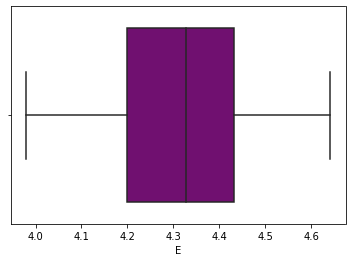

In [58]:
sns.boxplot(data_clean['E'],color="purple")

Using zscore the outliers in the feature E is completely removed and the data loss after removing outlier is 3.333333%

In [59]:
z2 = np.abs(stats.zscore(data_clean['SHO']))
print(z2)


[0.75600102 0.27462951 0.20607206 0.47082925 0.27462951 2.22523123
 0.20607206 0.27462951 0.20607206 0.47082925 0.4950723  0.27462951
 0.27462951 0.90414102 0.90414102 0.4950723  1.94646424 1.06604577
 0.75600102 0.70448114 0.4950723  0.27462951 0.20607206 1.06604577
 1.94646424 1.45440695 0.27462951 1.40721923 2.22523123]


In [60]:
data_clean['SHO'] = data_clean[(z2<3)]
data_clean.shape

(29, 17)

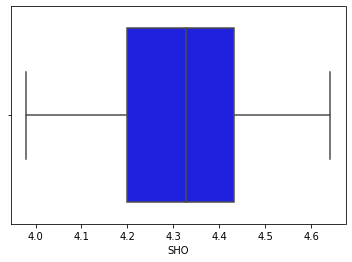

In [61]:
sns.boxplot(data_clean['SHO'],color="blue")

Using zscore the outliers in the feature SHO is completely removed and the data loss after removing outlier is 3.333333%

In [62]:
data1=data_clean

In [63]:
x1=data1.drop('W',axis=1)
y1=data1['W']

feature scaling transforming on unscaled data into scaled data using min max scalining technique

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [66]:
x=scaled
y=y1

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [68]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Mean absolute error 0.053028329990761125
Mean squared error 0.005678962014003077
Root Mean squared error 0.07535888808895125
R2 Score 0.8400735193637974
---------------------------------------------------------------------------------------------------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 0.07579753374040377
Mean squared error 0.012146133854625202
Root Mean squared error 0.11020949983837693
R2 Score 0.6579500908939535
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                  

CROSS VALIDATION

In [69]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scores.mean()

0.5713132024012026

In [70]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scores.mean()

0.3253401662873542

In [71]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scores.mean()

0.6201768725324509

In [72]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scores.mean()

1.0

In [73]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scores.mean()

0.9267356674958606

In [74]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR KNeighbors
0.8400735193637974-0.5713132024012026

0.2687603169625947

In [75]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR SVR
0.6579500908939535-0.8268256482119917

-0.16887555731803816

In [76]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR DecisionTreeRegressor
0.8273726805475855-0.9133366

-0.08596391945241455

In [77]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR LinearRegression
1.0-1.0

0.0

In [78]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR GradientBoosting
0.9507706321748299-0.9134420081761275

0.037328623998702404

I have found difference of predicted model with cross validation to avoid overfitting of data. In the above process linear regression model has zero difference but it hae high absolute mean error and root mean squarred error value.So I'm selecting gradient boosting regressor as best model because it has second least difference(0.037328623998702404) and it has very less error values compare to linear regression model

Hyper tuning

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {"learning_rate": [0.01, 0.1],
               "n_estimators": [10, 100,500,1000],
               "max_depth": [3, 5, 8]
              
                    }

grid = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters, scoring = "r2")

In [80]:
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}


In [81]:
print(grid.best_estimator_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=1000)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)

Accuracy 0.9608958560163576
Mean absolute error 0.03187931184407122
Mean squared error 0.0013885814743736778
Root Mean squared error 0.037263674998229544
r2 score 0.9608958560163576


# Accuracy 0.9608958560163576
Mean absolute error 0.03187931184407122
Mean squared error 0.0013885814743736778
Root Mean squared error 0.037263674998229544
r2 score 0.9608958560163576

It is apparent that after hyper tuning the accuracy is slightly increased to 0.9608958560163576.

_Best model:Gradient Boosting Regressor _Best parameter: learning_rate: 0.01, 'max_depth': 3, n_estimators: 1000

MODEL SAVING

In [83]:
from joblib import dump
dump(model, 'model_baseball.joblib')

['model_baseball.joblib']

In [84]:
from joblib import load
loaded = load('model_baseball.joblib')